# Linear Regression

## What is Regression Analysis?

Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent (target) and independent variable (s) (predictor). This technique is used for forecasting, time series modelling and finding the causal effect relationship between the variables. For example, relationship between rash driving and number of road accidents by a driver is best studied through regression.


Regression analysis is an important tool for modelling and analyzing data. Here, we fit a curve / line to the data points, in such a manner that the differences between the distance of data points from the curve or line is minimized. The topic will be explained in detail in coming sections.

## Why do we use Regression Analysis?

As mentioned above,Regression analysis estimates the relationship between two or more variables. Let’s understand this with an easy example:

Let’s say, you want to estimate growth in sales of a company based on current economic conditions. You have the recent company data which indicates that the growth in sales is around two and a half times the growth in the economy. Using this insight, we can predict future sales of the company based on current & past information.

There are multiple benefits of using Regression analysis. They are as follows:

   * It indicates the significant relationships between dependent variable and independent variable.
   * It indicates the strength of impact of multiple independent variables on dependent variable.

Regression analysis also allows us to compare the effects of variables measured on different scales, such as the effect of price changes and the number of promotional activities. These benefits help Market Researchers / Data Analysts / Data Scientists to eliminate and evaluate the best set of variables to be used for building predictive models.

## Linear Regression

It is one of the most widely known modeling technique. Linear regression is usually among the first few topics which people pick while learning predictive modeling. In this technique, the dependent variable is continuous, independent variable(s) can be continuous or discrete, and nature of regression line is linear.

Linear Regression establishes a relationship between dependent variable (Y) and one or more independent variables (X) using a best fit straight line (also known as regression line).

It is represented by an equation Y=a+b*X + e, where a is intercept, b is slope of the line and e is error term. This equation can be used to predict the value of target variable based on given predictor variable(s).

In [278]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# this allows plots to appear directly in the notebook
%matplotlib inline

## Example: Advertising Data

Let's take a look at some data, ask some questions about that data, and then use Linear regression to answer those questions!

In [279]:
# read data into a DataFrame
data = pd.read_csv(r'C:\Users\Vaibhav\Desktop\BA\Datasets\data_sets\Advertising.csv', index_col=0)
data.head()
data.columns = ['TV','Radio','Newspaper','Sales']
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: Advertising dollars spent on Radio
- Newspaper: Advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [280]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 **observations**, and thus 200 markets in the dataset.

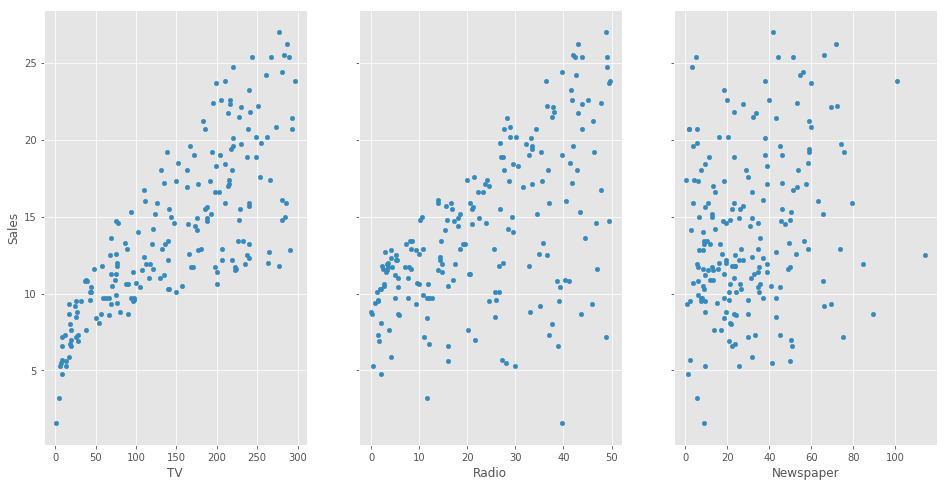

In [281]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

These general questions might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

## Simple Linear Regression

Simple Linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="simple_regression.png">

### The mathematics behind the Least Squares Method.

Take a quick look at the plot created. Now consider each point, and know that each of them have a coordinate in the form (X,Y). Now draw an imaginary line between each point and the current "best-fit" line. We'll call the distanace between each point and the current best-fit line as D. To get a quick image of what we're trying to visualize, take a look at the picture below:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png">

Now as before, we're labeling each green line as having a distance D, and each red point as having a coordinate of (X,Y). Then we can define our best fit line as the line having the min SSE:
$$ D_{1}^2 + D_{2}^2 + D_{3}^2 + D_{4}^2 + ....+ D_{N}^2$$

So how do we find this line? The least-square line approximating the set of points:

$$ (X,Y)_{1},(X,Y)_{2},(X,Y)_{3},(X,Y)_{4},(X,Y)_{5}, $$

has the equation:
$$ Y = a_{0} +a_{1}X $$
this is basically just a rewritten form of the standard equation for a line:
$$Y=mx+b$$

We can solve for these constants a0 and a1 by simultaneously solving these equations:
$$ \Sigma Y = a_{0}N + a_{1}\Sigma X $$
$$ \Sigma XY = a_{0}\Sigma X + a_{1}\Sigma X^2 $$

These are called the normal equations for the least squares line. There are further steps that can be taken in rearranging these equations  to solve for y, but we'll let scikit-learn do the rest of the heavy lifting here.

## scikit-learn

### Introduction

Since its release in 2007, scikit-learn has become one of the most popular open source Machine Learning libraries for Python. scikit-learn provides algorithms for Machine Learning tasks including classification, regression, dimensionality reduction, and clustering. It also provides modules for extracting features, processing data, and evaluating models.

Conceived as an extension to the SciPy library, scikit-learn is built on the popular Python libraries NumPy and matplotlib. NumPy extends Python to support efficient operations on large arrays and multidimensional matrices. matplotlib provides visualization tools, and SciPy provides modules for scientific computing.

scikit-learn is popular for academic research because it has a well-documented, easy-to-use, and versatile API. Developers can use scikit-learn to experiment with different algorithms by changing only a few lines of the code. scikit-learn wraps some popular implementations of machine learning algorithms, such as LIBSVM and LIBLINEAR. Other Python libraries, including NLTK, include wrappers for scikit-learn. scikit-learn also includes a variety of datasets, allowing developers to focus on algorithms rather than obtaining and cleaning data.

Licensed under the permissive BSD license, scikit-learn can be used in commercial applications without restrictions. Many of scikit-learn's algorithms are fast and scalable to all but massive datasets. Finally, scikit-learn is noted for its reliability; much of the library is covered by automated tests.

#### Creating a simple lin reg eqn between IV: TV and DV: sales

In [282]:
# creating a simple lin reg eqn between X Var TV and sales
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)
print(lm.score(X,y)) #to get the R2 value on training data
#R2 refers to the %age of output explained correctly by the IVs in the model 
#or %age of variance in y explained by the Independent Variables.

7.0325935491276965
[0.04753664]
0.611875050850071


## Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [283]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, we would predict Sales of **9,409 widgets** in that market.

In [284]:
#Creating the test dataframe
# you have to create a DataFrame since the Statsmodels formula interface expects a dataframe
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [285]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([9.40942557])

## Plotting the Least Squares Line

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

In [286]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [287]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

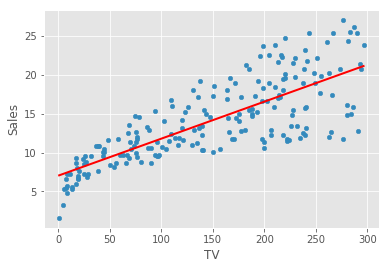

In [288]:
# first, plot the observed training data
data.plot(kind='scatter', x='TV', y='Sales') #so we have done data.plot to indicate data is the df 

# then, plot the least squares line on the test data
plt.plot(X_new, preds, c='red', linewidth=2)

## Confidence in our Model

**Question:** Is linear regression a high bias/low variance model, or a low bias/high variance model?

**Answer:** It's a High bias/low variance model. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). Note that low variance is a useful characteristic when you don't have a lot of training data!

A closely related concept is **confidence intervals**. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

In [289]:
#Calculating the 95% confidence interval - create a lin model using statsmodel
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
lm.conf_int(alpha = .05) #gives the 95% confidence interval for coefficient of TV (IV) and intercept
#Note the 95% confidence interval is same as we obtain through the summary below. 
#If the 95% confidence interval include the 0, then H0 is retained else H0 is rejected 

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [290]:
y_predicted = lm.predict(X)
error =y_predicted-y
sse = sum(error**2)
sse

2102.5305831313517

In [291]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.47e-42
Time:                        10:58:46   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

## Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [292]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

<img src="Rsq.png">

Rsq indicates what percentage of variation in y is explained by this IV. To explain the rest of the variation, more IVs are required.

In [293]:
# print the R-squared value for the model
lm.rsquared

0.611875050850071

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

In [294]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
skcoef = lm.coef_
print(skcoef)
print(lm.score(X,y))

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]
0.8972106381789521


How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** is associated with an **increase in Sales of 45.765 widgets**.

A lot of the information we have been reviewing piece-by-piece is available in the model summary output which can be obtined using statmodel:

In [295]:
#creating the linear model using stat-model
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.conf_int(alpha = .05)

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
Radio,0.171547,0.205513
Newspaper,-0.012616,0.010541


In [296]:
lm.rsquared

0.8972106381789522

In [297]:
#0.8972106381789521 - this is the Rsquared value withou the newspaper var
#rsquared value will increase even if we add insignificant var to our model
#so we use adjusted rsq for comparing the models. It will penalize the model, if I add insignificant / unrelated variables to the model.

In [298]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.58e-96
Time:                        10:58:46   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things we learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

## Feature Selection

How do I decide **what features has to be included** in a linear model? Here's one idea:
- Try different models, and only keep predictors in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new predictors.

What are the **drawbacks** in this approach?
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 predictors to a model that are **pure noise**, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [299]:
# only include TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared

0.8971942610828957

In [300]:
lm.rsquared_adj

0.8961505479974429

In [301]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.83e-98
Time:                        10:58:46   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [302]:
y_predicted = lm.predict(X)
error = y_predicted - y
sse = sum(error**2)
mse = sse/X.shape[0]
rmse = mse**.5 #on an average what is the deviation / error
print(sse, mse, rmse)

556.9139800676182 2.784569900338091 1.6687030593661927


In [303]:
skcoef #note the coefficients from statsmodel and sklearn are same

array([ 0.04576465,  0.18853002, -0.00103749])

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

So is there a better approach to feature selection? **Cross-validation.** It provides a more reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.

## Handling Categorical Predictors with Two Categories

Up until now, all the predictors have been numeric. What if one of the predictors was categorical?

Let's create a new feature called **Size**, and randomly assign observations to be **small or large**:

In [304]:
#Creating a column size having values small or large
import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large' #conditional modification of the column
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


For scikit-learn, we need to represent all data **numerically**. If the feature only has two categories, we can simply create a **dummy variable** that represents the categories as a binary value:

In [305]:
# create a new Series called IsLarge
data['IsLarge'] = data.Size.replace({'small':0, 'large':1})

#or 
data['IsLarge'] = data.Size.map({'small':0, 'large':1})

data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


Let's redo the multiple linear regression and include the **IsLarge** predictor:

In [306]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
list(zip(feature_cols, lm.coef_))

[('TV', 0.04571982092436275),
 ('Radio', 0.1887281431342786),
 ('Newspaper', -0.0010976794483516517),
 ('IsLarge', 0.05742385085482756)]

How do we interpret the **IsLarge coefficient**? For a given amount of TV/Radio/Newspaper ad spending, being a large market is associated with an average **increase** in Sales of 57.42 widgets (as compared to a Small market, which is called the **baseline level**).

What if we had reversed the 0/1 coding and created the feature 'IsSmall' instead? The coefficient would be the same, except it would be **negative instead of positive**. As such, your choice of category for the baseline does not matter, all that changes is your **interpretation** of the coefficient.

## Handling Categorical Predictors with More than Two Categories

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban**:

In [307]:
#Creating a categorical column having 3 levels: rural, urban and suburban
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


We have to represent Area numerically, but we can't simply code it as 0=rural, 1=suburban, 2=urban because that would imply an **ordered relationship** between suburban and urban (and thus urban is somehow "twice" the suburban category).

Instead, we create **another dummy variable**:

In [308]:
# create three dummy variables using get_dummies, then exclude the first dummy column
#Also called as one hot encoding or dummy encoding. 1 - represents hot and 0 - represents cold
area_dummies = pd.get_dummies(data.Area, prefix='Area', drop_first=False)
area_dummies.head()

,Area_rural,Area_suburban,Area_urban
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0


In [309]:
# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies.iloc[:,1:]], axis=1) #excluding 1 column Area_rural
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [310]:
data = data.drop('Area', axis =1)

### Here is how we interpret the coding:
- **rural** is coded as Area_suburban=0 and Area_urban=0
- **suburban** is coded as Area_suburban=1 and Area_urban=0
- **urban** is coded as Area_suburban=0 and Area_urban=1

Why do we only need **two dummy variables, not three?** Because two dummies captures all of the information about the Area feature, and implicitly defines rural as the baseline level. (In general, if you have a categorical feature with k levels, you create k-1 dummy variables.)

If this is confusing, think about why we only needed one dummy variable for Size (IsLarge), not two dummy variables (IsSmall and IsLarge).

Let's include the two new dummy variables in the model:

In [311]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']
# We have to exclude Area and Size variables, as one of the pre-requisites for Li Re is X vars should be independent of each other.
# Both Size and isLarge are extremely correlated
#Also high correlation bw Area and Area_suburban; and Area and Area_urban
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
print(feature_cols, lm.coef_)

['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]


How do we interpret the coefficients?
- Holding all other variables fixed, being a **suburban** area is associated with an average **decrease** in Sales of 106.56 widgets (as compared to the baseline level, which is rural).
- Being an **urban** area is associated with an average **increase** in Sales of 268.13 widgets (as compared to rural).

**A final note about dummy encoding:** If you have categories that can be ranked (i.e., strongly disagree, disagree, neutral, agree, strongly agree), you can potentially use a single dummy variable and represent the categories numerically (such as 1, 2, 3, 4, 5).

------------------

## CASE STUDY 2: Exploring Li. Re. using SKLearn

In [312]:
# Importing data for supervised learning
# Gapminder Countries GDP data
# Each row represents a country
# Dependent variable is the life expectancy of each country

import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('C:/Users/Vaibhav/Desktop/BA/Datasets/gm_2008_region.csv')

In [313]:
df.head(3)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America


In [314]:
df = df.drop("Region", axis = 1)

In [315]:
y = df['life']
X = df.drop("life", axis = 1)
X.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,5.2


In [316]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

In [317]:
s.fit(X)
X_arr = s.transform(X)
#or directly
X_arr = s.fit_transform(X)

X = pd.DataFrame(X_arr,columns=X.columns)


In [318]:
X.head(3)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality
0,-0.006312,-0.170924,-0.413288,-0.181071,-0.012199,-0.225978,0.718822,-0.342343
1,-0.143492,2.127879,0.019209,-0.478008,-1.077595,-0.498262,0.768150,3.224390
2,0.044742,-0.475360,-0.322236,0.052083,1.307639,-0.104127,-1.752833,-0.651826


In [346]:
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler()

In [347]:
X_arr = m.fit_transform(X)
X = pd.DataFrame(X_arr, columns=X.columns)

In [348]:
X.head(3)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality
0,0.028855,0.229794,0.001548,0.068188,0.520969,0.093443,0.691602,0.141574
1,0.016348,0.816165,0.075077,0.030101,0.229964,0.051917,0.703734,1.000000
2,0.033510,0.152139,0.017028,0.098094,0.881472,0.112027,0.083681,0.067089


In [343]:
from sklearn.preprocessing import RobustScaler
r = RobustScaler()
#(x - q1(x))/(IQR)

In [344]:
X_arr = r.fit_transform(X)

In [345]:
Xr = pd.DataFrame(X_arr, columns=X.columns)
Xr.head(3)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality
0,1.038854,0.140044,-0.250000,0.181381,-0.138486,0.116588,0.480614,0.083207
1,0.419462,1.759300,1.333333,-0.123001,-0.717670,-0.139110,0.511819,2.541604
2,1.269367,-0.074398,0.083333,0.420382,0.579021,0.231016,-1.082968,-0.130106


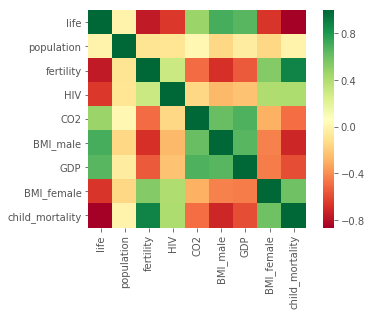

In [349]:
# Exploring the Gapminder data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

In [350]:
# Linear regression on all features

from sklearn import linear_model

X_train, X_test, y_train, y_test = \
train_test_split(X, y,test_size = 0.3, random_state=42)#random state is the random seed

reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.8380468731430062

In [351]:
list(reg_all.coef_.ravel())

[-2.431944787042918,
 -2.087412905268721,
 -18.636690329062038,
 -7.183368492534527,
 3.974971268705297,
 17.288136359644845,
 -4.572918970237888,
 -16.416341179282743]

In [328]:
type(y_train)

pandas.core.series.Series

In [352]:
correlations = []
for i in range(X_train.shape[1]):
    correlations.append(np.corrcoef(X_train.iloc[:,i].values,y_train.values)[0,1])
correlations

[-0.0016057249704628455,
 -0.7604268848113768,
 -0.6520838624732981,
 0.47383083642740864,
 0.7083548855855238,
 0.6642345071094585,
 -0.6639664177284894,
 -0.8633840852549777]

In [353]:
{'Coef': list(reg_all.coef_.ravel()), 'Columns':list(X.columns), 'Correlations': correlations}

{'Coef': [-2.431944787042918,
  -2.087412905268721,
  -18.636690329062038,
  -7.183368492534527,
  3.974971268705297,
  17.288136359644845,
  -4.572918970237888,
  -16.416341179282743],
 'Columns': ['population',
  'fertility',
  'HIV',
  'CO2',
  'BMI_male',
  'GDP',
  'BMI_female',
  'child_mortality'],
 'Correlations': [-0.0016057249704628455,
  -0.7604268848113768,
  -0.6520838624732981,
  0.47383083642740864,
  0.7083548855855238,
  0.6642345071094585,
  -0.6639664177284894,
  -0.8633840852549777]}

In [354]:
dummy = pd.DataFrame({'Coef': list(reg_all.coef_.ravel()), 'Columns':list(X.columns), 'Correlations': correlations})

In [332]:
#Model using statsmodel

In [355]:
df= pd.DataFrame(np.c_[y_train,X_train], columns=['life']+list(X.columns))

In [356]:
df.head(3)

,life,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality
0,74.0,0.000888,0.053883,0.044118,0.267444,0.727960,0.192489,0.670140,0.014791
1,54.8,0.009076,0.876387,0.129257,0.000805,0.135028,0.009284,0.578947,0.873217
2,75.5,0.002039,0.175911,0.063467,0.090009,0.447517,0.066644,0.441200,0.085578


In [358]:
l = list(X.columns)
"+".join(l)

'population+fertility+HIV+CO2+BMI_male+GDP+BMI_female+child_mortality'

In [382]:
#Calculating the 95% confidence interval - create a lin model using statsmodel
import statsmodels.formula.api as smf
lm = smf.ols(formula='life ~ population+fertility+HIV+CO2+BMI_male+GDP+BMI_female+child_mortality', data=df).fit()

In [384]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.72e-42
Time:                        13:09:14   Log-Likelihood:                -240.17
No. Observations:                  97   AIC:                             498.3
Df Residuals:                      88   BIC:                             521.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          73.8485      1.469     50.261      0.000      70.929      76.768
population         -2.4319      3.067     -0.793      0.430      -8.527       3.663
fertility          -2.0874      2.784     -0.750      0.455      -7.620       3.446
HIV               -18.6367      2.031     -9.174      0.000     -22.674     -14.600
CO2                -7.1834      4.549     -1.579      0.118     -16.224       1.857
BMI_male            3.9750      1.915      2.076      0.041       0.170       7.780
GDP                17.2881      3.773      4.582      0.000       9.790      24.786
BMI_female         -4.5729      1.619     -2.825      0.006      -7.790      -1.356
child_mortality   -16.4163      3.151     -5.210      0.000     -22.678     -10.155
==============================================================================
Omnibus:                       14.527   Durbin-Watson:                   2.190
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.177
Skew:                          -0.871   Prob(JB):                     0.000307
Kurtosis:                       3.983   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [389]:
dummy['PValues%age'] = list(lm.pvalues[1:]*100)

In [390]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(dummy.sort_values("PValues%age", ascending=True))

     Coef          Columns  Correlations  PValues  PValues%age
2 -18.637              HIV        -0.652    0.000        0.000
7 -16.416  child_mortality        -0.863    0.000        0.000
5  17.288              GDP         0.664    0.002        0.002
6  -4.573       BMI_female        -0.664    0.585        0.585
4   3.975         BMI_male         0.708    4.082        4.082
3  -7.183              CO2         0.474   11.792       11.792
0  -2.432       population        -0.002   42.992       42.992
1  -2.087        fertility        -0.760   45.542       45.542


In [362]:
df.corr()

,life,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality
life,1.000000,-0.001606,-0.760427,-0.652084,0.473831,0.708355,0.664235,-0.663966,-0.863384
population,-0.001606,1.000000,-0.086530,-0.078534,0.021922,-0.143519,-0.036561,-0.143139,-0.009355
fertility,-0.760427,-0.086530,1.000000,0.302273,-0.496903,-0.676036,-0.548643,0.538295,0.884517
HIV,-0.652084,-0.078534,0.302273,1.000000,-0.148201,-0.266137,-0.228059,0.404870,0.416755
CO2,0.473831,0.021922,-0.496903,-0.148201,1.000000,0.621449,0.684285,-0.294830,-0.488808
BMI_male,0.708355,-0.143519,-0.676036,-0.266137,0.621449,1.000000,0.663580,-0.431120,-0.717574
GDP,0.664235,-0.036561,-0.548643,-0.228059,0.684285,0.663580,1.000000,-0.444283,-0.581190
BMI_female,-0.663966,-0.143139,0.538295,0.404870,-0.294830,-0.431120,-0.444283,1.000000,0.592579
child_mortality,-0.863384,-0.009355,0.884517,0.416755,-0.488808,-0.717574,-0.581190,0.592579,1.000000


In [149]:
#Probability is a more accurate way of obtaining the significance of a variable

In [150]:
### Performance Metrics: SSE, RMSE, MSE, R2 

In [151]:
y_train[:3]

40    74.0
24    54.8
64    75.5
Name: life, dtype: float64

In [152]:
y_pred_train = lm.predict(X_train)
train_error = y_pred_train - y_train
y_pred_test = lm.predict(X_test)
test_error = y_pred_test - y_test
print(train_error[:3], test_error[:3])

40   -0.095431
24   -1.502951
64   -4.344503
dtype: float64 135    1.085231
66     5.617465
31    -1.061679
dtype: float64


In [153]:
from sklearn.metrics import r2_score, mean_squared_error

In [154]:
SSE = np.sum((y_pred_test - y_test)**2)
SSE

442.9703365524277

In [155]:
#or 
SSE = mean_squared_error(y_test, y_pred_test)*y_test.shape[0]
SSE

442.9703365524277

In [156]:

SST = np.sum((y_test - (np.mean(y_train)))**2)
R2 = 1-SSE/SST
R2

0.842265127820883

In [157]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
#R2 informs what %age of output is explained by the IVs in the current model


R^2: 0.8380468731430062


In [158]:
r2_score(y_test, y_pred_test)

0.8380468731430032

In [159]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
#RMSE tells us that on an average, how far is the prediction different from actual
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 3.247601080037048


### Cross-validation to check for variance error (over-fitting)

In [160]:
# 5-fold cross-validation

# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression() #sklearn has a liner_model module which has LinearRegression class

In [161]:
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722792025


In [162]:
#Bias error - my model has underperfomed on the training data itself - i.e the model has not fitted properly on training data
#High bias error means under-fitting error
#variance error - over-fitting error i.e when my model over-fits to the training data, 
#it will underperform if I vary my data (on test data or unknown data)
#There is always a trade off between bias error and variance erro

### Polynomial Regression

In [391]:
#Add the polynomial Features in the feature set
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)

In [392]:
X_train

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality
40,0.001,0.054,0.044,0.267,0.728,0.192,0.670,0.015
24,0.009,0.876,0.129,0.001,0.135,0.009,0.579,0.873
64,0.002,0.176,0.063,0.090,0.448,0.067,0.441,0.086
125,0.055,0.032,0.048,0.079,0.324,0.093,0.172,0.068
137,0.011,0.729,0.524,0.003,0.035,0.020,0.832,0.487
44,0.001,0.475,0.203,0.022,0.456,0.121,0.717,0.345
15,0.008,0.349,0.005,0.029,0.501,0.036,0.278,0.260
108,0.010,0.607,0.029,0.009,0.190,0.013,0.712,0.386
39,0.004,0.615,0.029,0.002,0.061,0.004,0.465,0.305
22,0.016,0.616,0.203,0.006,0.408,0.016,0.547,0.587


In [394]:
X_train.shape

(97, 8)

In [395]:
X_train_poly = poly_features.fit_transform(X_train)
X_train_poly.shape

(97, 45)

In [396]:
#Apply Linear Regression over Polynomial Features
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#model.fit(X_train,y_train)
model.fit(X_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [397]:
X_test_poly = poly_features.transform(X_test)
ytest_predicted = model.predict(X_test_poly)
ytest_predicted

array([64.5625  , 73.3125  , 75.921875, 62.75    , 79.296875, 73.734375,
       59.078125, 74.546875, 58.25    , 72.78125 , 75.875   , 55.296875,
       60.875   , 57.890625, 49.625   , 74.703125, 80.375   , 63.3125  ,
       76.921875, 73.671875, 69.90625 , 78.3125  , 55.328125, 81.65625 ,
       71.734375, 75.671875, 80.046875, 71.59375 , 30.421875, 73.71875 ,
       74.40625 , 76.578125, 70.453125, 72.0625  , 74.515625, 59.828125,
       71.875   , 78.1875  , 76.296875, 71.65625 , 64.59375 , 60.21875 ])

In [398]:
r2_score(y_test, ytest_predicted)

0.43072237364572996

-------

### Linear Regression + Implementing CrossValidation to check Variance Error in the final model

In [170]:
# Fit & predict for regression
import pandas as pd
import matplotlib.pyplot as plt
# Read the CSV file into a DataFrame: df
df = pd.read_csv('C:\\Users\\Vaibhav\\Desktop\\BA\\Datasets\\gm_2008_region.csv')

# Create arrays for features and target variable
#even if we don't reshape still we should get
#finding the relationship bw 'life' var and 'fertility' var 
y = df['life'].values.reshape(-1,1)
X_fertility = df['fertility'].values.reshape(-1,1)

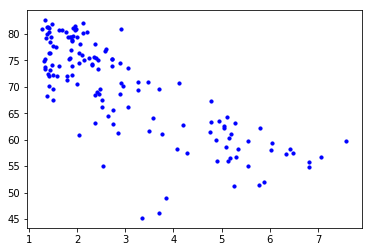

In [171]:
plt.scatter(X_fertility,y,c='blue',s=10);

#### Creating Li Re model between X_fertility and y var and demonstrating pictorially

0.6192442167740035


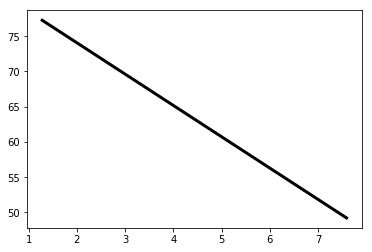

In [172]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility,y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

#### Creating multiple linear regression model

In [173]:
# Train/test split for regression

# Import necessary modules
import numpy as np
from sklearn.linear_model import LinearRegression #linear_model module of sklearn has Li Re class
from sklearn.metrics import mean_squared_error #sklearn.metrics lib has all the performance metrics for regression as well as classification
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) #random seed 

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

#On train data - we look for adjusted Rsq as the performance metric of bias accuracy
#On test data - we'll compute Rsq value

### Performance Metrics

In [174]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
#R2 informs what %age of output is explained by the IVs in the current model
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
#RMSE tells us that on an average, how far is the prediction different from actual
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731430062
Root Mean Squared Error: 3.2476010800370188


In [175]:
SSE = np.sum((y_pred - y_test)**2)
SST = np.sum((y_test - (np.mean(y_train)))**2)
R2 = 1-SSE/SST
R2

0.8422651278208859

### Cross-validation to check for variance error (over-fitting)

In [176]:
# 5-fold cross-validation

# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression() #sklearn has a liner_model module which has LinearRegression class

In [177]:
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722792025


#### Let's try to understand the time taken to run 5-fold cross-validation and 20-fold cross-validation.

In [178]:
%timeit cv_scores = cross_val_score(reg,X,y,cv=5)

28.2 ms ± 1.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [179]:
%timeit cv_scores = cross_val_score(reg,X,y,cv=20)

165 ms ± 57.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


----

## Case Study 3: Boston Case Study - Demonstrating Simple Linear Regression and it's visualization

In [180]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
plt.style.use('ggplot')

In [181]:
# Boston housing data
# https://www.kaggle.com/c/boston-housing
boston = pd.read_csv('C:\\Users\\Vaibhav\\Desktop\\BA\\Datasets\\boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [182]:
# Creating feature and target arrays for a multi-variate regression
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [183]:
y = y.reshape(-1, 1) #this means no. of rows is len(array) and no. of cols is 1
print("\n")
print(y[:5,:])



[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]]


In [184]:
# Predicting house value from a single feature
X_rooms = X[:,5]
print(X_rooms)

[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066 6.51  6.25  7.489 7.802 8.375 5.8

In [185]:
#Converting X_rooms to 2-d array for plotting
X_rooms = X_rooms.reshape(-1, 1) #this will create nrow rows and 1 col to get a 2-d dataset
print(X_rooms[:5,:])
print(X_rooms.shape)

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
(506, 1)


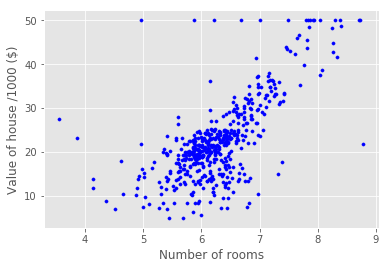

In [186]:
# Plotting house value vs. number of rooms
#Scatterplot will come correct even if we don't reshape
plt.scatter(X_rooms, y, s=10, c='blue')
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

In [187]:
X_rooms.shape

(506, 1)

In [188]:
# Fitting a regression model

import numpy as np
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_rooms, y) #training the model

#We will make predictions on the following prediction space (X-data)
prediction_space = np.linspace(min(X_rooms),
                               max(X_rooms)).reshape(-1, 1)
prediction_space[0:5]

array([[3.561     ],
       [3.6675102 ],
       [3.77402041],
       [3.88053061],
       [3.98704082]])

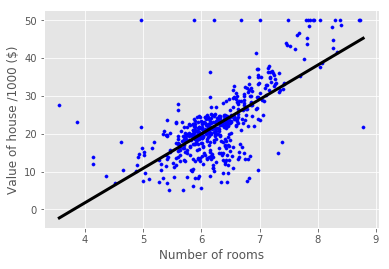

In [189]:
plt.scatter(X_rooms, y, color='blue', s=10)
plt.plot(prediction_space, reg.predict(prediction_space),
         color='black', linewidth=3)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

In [190]:
# Linear regression on all features

from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)

reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.7112260057484906

#### Performance Metrics Explained

In [191]:
from sklearn.metrics import r2_score, mean_squared_error
R2 = r2_score(y_test, y_pred) 
print('Rsq: %.2f' %R2)

Rsq: 0.71


In [192]:
SST = np.sum((y_test - np.mean(y_train))**2)


In [193]:
SSE = np.sum((y_pred - y_test)**2)
#or 
SSE = mean_squared_error(y_test, y_pred)*y_test.shape[0]
print(SSE, SST)
Rsq = 1 - SSE/SST
print('Rsq: %.2f' %Rsq)

3270.651523138966 11718.974534776085
Rsq: 0.72


In [194]:
from sklearn.model_selection import cross_validate

In [195]:
np.random.seed(42)
scores = cross_validate(reg_all, X,y, scoring='r2',
                        cv=5,return_train_score=True)

In [196]:
scores['test_score']
#shows high variance error - performs poorly on cross-validation

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [197]:
scores['test_score'].mean()

0.35327592439588007